# The Hodgkin-Huxley model

In this module we will use Python to simulate the Hodgkin-Huxley (HH) neuron model.  This model is arguably the *most* important computational model in neuroscience.  We'll focus here on simulating this model and understanding its pieces.

## Background information about the HH model

Here's a video that describes some of the biophysical details of the HH model:

In [1]:
from IPython.lib.display import VimeoVideo
VimeoVideo('140084450')

Here are some additional usual videos and references:

- [Lecture by Prof. Gerstner, *Detailed Neuron Model (a)*](http://klewel.com/conferences/epfl-neural-networks/index.php?talkID=4)

- [Lecture by Prof. Gerstner, *Detailed Neuron Model (b)*](http://klewel.com/conferences/epfl-neural-networks/index.php?talkID=5)

##  Preliminaries 

Before beginning, let's load in the Python packages we'll need:

In [2]:
from pylab import *
import math
%matplotlib inline

In addition, let's import the functions we'll need to simulate the HH model, which are available on this repository:

In [3]:
from HH_functions import HH

##  Part 1:   The Hodgkin-Huxley (HH) equation code.

To start, let's examine the code for the HH model. We can do so in (at least) two ways.

- Go to the Case Studies repository, and examine the Python file
`HH_functions.py`
- Examine the code inline with `inspect`

In [4]:
import inspect
inspect.getsourcelines(HH)

(['def HH(I0,T0):\n',
  '    dt = 0.01;\n',
  '    T  = math.ceil(T0/dt)  # [ms]\n',
  '    gNa0 = 120   # [mS/cm^2]\n',
  '    ENa  = 115;  # [mV]\n',
  '    gK0  = 36;   # [mS/cm^2]\n',
  '    EK   = -12;  # [mV]\n',
  '    gL0  = 0.3;  # [mS/cm^2]\n',
  '    EL   = 10.6; # [mV]\n',
  '\n',
  '    t = np.arange(0,T)*dt\n',
  '    V = np.zeros([T,1])\n',
  '    m = np.zeros([T,1])\n',
  '    h = np.zeros([T,1])\n',
  '    n = np.zeros([T,1])\n',
  '\n',
  '    V[0]=-70.0\n',
  '    m[0]=0.05\n',
  '    h[0]=0.54\n',
  '    n[0]=0.34\n',
  '\n',
  '    for i in range(0,T-1):\n',
  '        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);\n',
  '        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);\n',
  '        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);\n',
  '        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);\n',
  '    return V,m,h,n,t\n'],
 22)

<div class="question">

**Q:**  Examine this code.  Can you make sense of it?  Can you identify the
gating variables?  The rate functions?  The equations that define the dynamics?
We'll answer these questions in this in module, but try so on your own first.

</div>

Whenever examining code, it's useful to consider the *inputs* to the code, and the *outputs* produced by the code.  There are two inputs to `HH0`:

- `I0` = the current we inject to the neuron.
- `T0` = the total time of the simulation in [ms].

And there are five outputs:

- `V` = the voltage of neuron.
- `m` = activation variable for Na-current.
- `h` = inactivation variable for Na-current.
- `n` = activation variable for K-current.
- `t` = the time axis of the simulation (useful for plotting).

## Part 2:  At low input current (`I0`), examine the HH dynamics.

  To understand how the HH model works, we'll start by focusing on the
  case when `I0` is small. Let's fix the input current to zero,

In [5]:
I0 = 0

and let's simulate the model for 100 ms,

In [6]:
T0 = 100

We've now defined both inputs to the `HH` function, and can execute it, as follows,

In [7]:
[V,m,h,n,t]=HH(I0,T0)

Notice that the function returns five outputs, which we assign to the variables `V`, `m`, `h`, `n`, and `t`.

<div class="question">

**Q:**  What are the dynamics of the voltage (variable `V`) resulting
from this simulation?<br>
HINT:  Plot `V` vs `t`.

</div>

<div class="question">

**Q:**   What are the dynamics of the gating variables (`m`, `h`, `n`)
resulting from this simulation?<br>
HINT:  Plot them!

</div>

<div class="question">

**Q:**  What are the final values (after the 100 ms of simulation) of
`V`, `m`, `h`, and `n`?

</div>

### Observation for Part 2
At this value of input current (`I0=0`), the model dynamics
approach a "fixed point", whose location we can identify as a point in four dimensional space.

## Part 3:  At high input current (`I0`), examine the HH dynamics of a spike.
  Let's now increase the input current to the HH model and get this model
  to generate repeated spiking activity.  To do so, let's set,

In [8]:
I0 = 10

We can now simulate this model,

In [9]:
[V,m,h,n,t] = HH(I0,T0)

<div class="question">

**Q:**  What happens to the dynamics?
HINT:  Plot V vs t.

</div>

  ### Observation for Part 3
  You should have found that, at this value of input current, the model
  **generates repeated spikes**.
  
  Let's now explore how the combined gates
  and dynamics evolve.  To do so, let's start by focusing our plot on a
  single spike.  As a first step, we'll make a new figure with a seperate subfigure to plot
  the voltage,

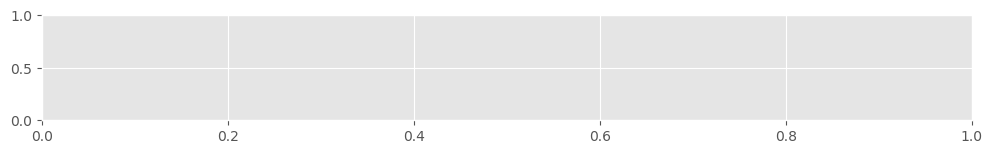

In [10]:
figure()
subplot(211)

This `subplot` command divides the figure into two rows, and one column, and tells Python we'll start in the first row. See Python Help for more details:

`subplot??`

Now, let's plot the voltage, and choose the time axis to focus on a single spike,

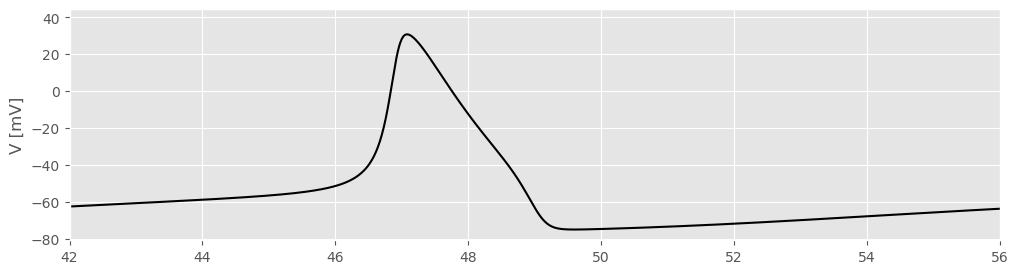

In [11]:
plot(t,V,'k')
xlim([42, 56])
ylabel('V [mV]');

  Okay, we've now plotted the voltage dynamics for a single spike (and
  colored the curve black).  Let's now plot the three gating variables.
  To do so, we'll move to the next subplot,

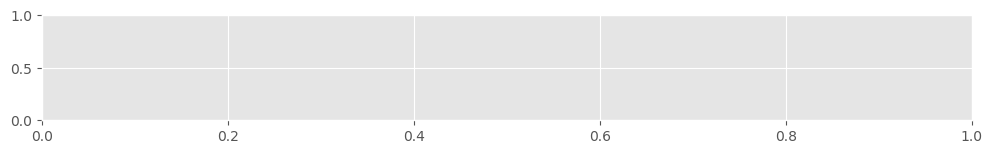

In [12]:
subplot(212);

(the next row in the figure).  Within this subplot, let's start by displaying the gating variable `m` over the same x-limits,

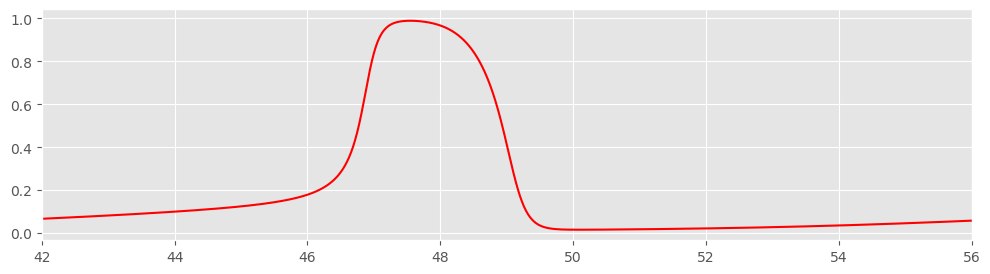

In [13]:
plot(t,m,'r', label='m')
xlim([42, 56]);

  Notice that, in the call to `plot` we included the input `label`. This will be useful when we create a legend ... <br><br>Within this subplot, we can also simultaneously show the gating
  variables `h` and `n`,

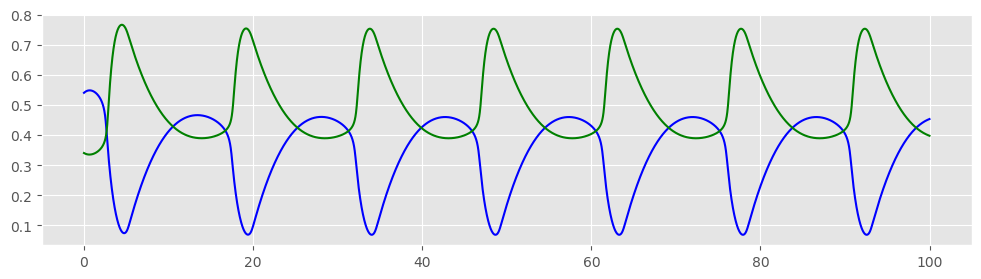

In [14]:
plot(t,h,'b', label='h')
plot(t,n,'g', label='n');

Label the x-axis,

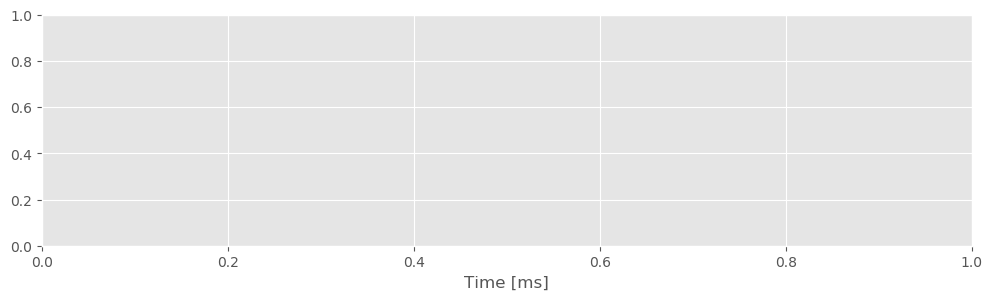

In [15]:
xlabel('Time [ms]');

Now, let's add a legend to help us keep track of the different curves,

No handles with labels found to put in legend.


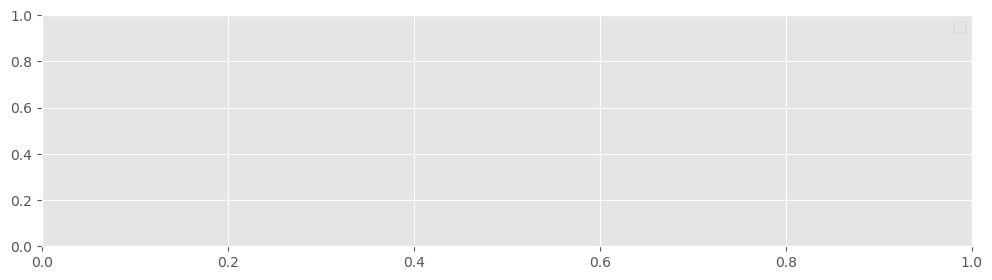

In [16]:
legend();

<div class="question">

**Q:** Using the figure you created above, describe how the gates swing open and closed during a spike.

</div>

### ASIDE: 
Here's a nice plotting trick, to link the x-axes of our two subfigures.  Linking the axes is useful so that, when we zoom or move one subfigure, the other subfigure will match the x-axis.

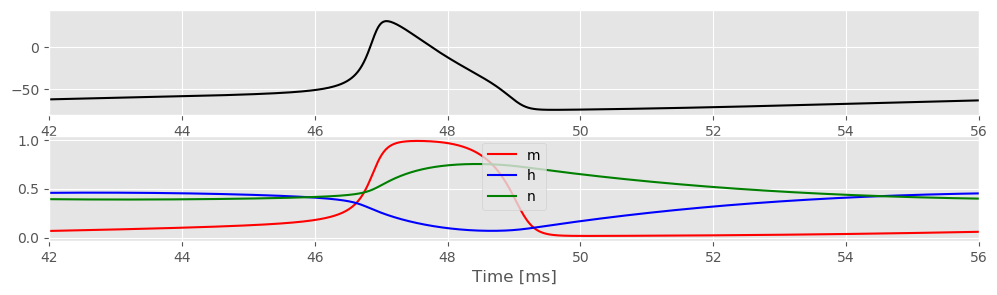

In [17]:
figure()
ax1 = subplot(211);                 # Define axis for 1st subplot,
ax2 = subplot(212, sharex=ax1);     # ... and link axis of 2nd subplot to the 1st.
ax1.plot(t,V,'k')                       # Plot the voltage in the first subplot,
xlim([42, 56]);
ax2.plot(t,m,'r', label='m')            # ... and the gating variables in the other subplot.
ax2.plot(t,h,'b', label='h')
ax2.plot(t,n,'g', label='n');
xlabel('Time [ms]');
legend();

Now, in the figure, you may use the pan/zoom tool to adjust the linked subplots.

## Part 4:  At high input current (`I0`), describe the dynamics of the conductances.
  In Part 3, we explored how the three gates `m`, `h`, and `n` evolve
  during a spike.  By combining these terms, we can visualize how the
  *conductances* evolve during a spike.  To do so, let's stick with the
  simulation results we generated in Part 3, and focus our plot on a
  single spike,

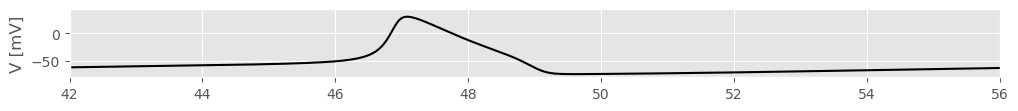

In [18]:
figure()
ax1=subplot(311)                # Make a subplot,
ax1.plot(t,V,'k')                   #... and plot the voltage,
xlim([42, 56])                  #... focused on a single spike,
ylabel('V [mV]');               #... with y-axis labeled.

Now, to plot the conductances, let's define three new variables,

In [19]:
gNa0 = 120
gNa  = gNa0*m**3*h                 # Sodium conductance
gK0  = 36
gK   = gK0*n**4                    # Potassium conductance
gL0  = 0.3
gL   = gL0*ones(shape(gK))   # Leak conductance

<div class="question">

**Q:** Where do these terms come from?

</div>

Then, let's plot these conductances,

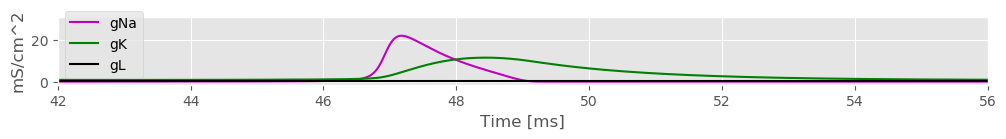

In [20]:
ax2 = subplot(312, sharex=ax1)  #Make a second subplot,
ax2.plot(t,gNa,'m', label='gNa')    #... and plot the sodium conductance,
ax2.plot(t,gK, 'g', label='gK')     #... and plot the potassium conductance,
ax2.plot(t,gL, 'k', label='gL')     #... and plot the leak conductance.
xlim([42, 56])                  #... focused on a single spike,
xlabel('Time [ms]')             #... label the x-axis.
ylabel('mS/cm^2')               #... and label the y-axis.
legend();                       #... make a legend.

<div class="question">

**Q:** How do the conductances evolve during a spike?

</div>

## Part 5:  At high input current (`I0`), describe the dynamics of the *currents*.
  In Part 4, we explored how the three conductances (`gNa`, `gK`, `gL`) evolve
  during a spike.  Let's now visualize how the *ionic currents* evolve
  during a spike.  To do so, let's stick with the same settings used in
  Part 4 and examine the same simulation result.  Again, we'll focus our plot
  on a single spike.
  
  
  Now, to plot the *current*, let's define the new variables,

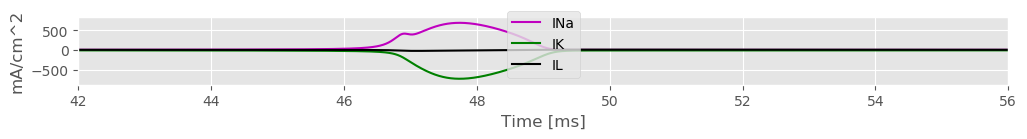

In [21]:
gNa0 = 120
ENa  = 115
INa  = gNa0*m**3*h*(ENa-(V+65))    # Sodium current.
gK0  = 36
EK   =-12
IK   = gK0*n**4*(EK-(V+65))        # Potassium current.
gL0  = 0.3
EL   = 10.6;
IL   = gL0*(EL-(V+65))             # Leak current.

ax3=subplot(313, sharex=ax1)   # Make a third subplot,
ax3.plot(t,INa,'m', label='INa')   #... and plot the sodium current,
ax3.plot(t,IK, 'g', label='IK')    #... and plot the potassium current,
ax3.plot(t,IL, 'k', label='IL')    #... and plot the leak current.
xlim([42, 56])                 #... focus on a single spike,
xlabel('Time [ms]')            #... label the x-axis.
ylabel('mA/cm^2')              #... and label the y-axis.
legend();                      #... make a legend.

<div class="question">

**Q:** How do the conductances evolve during a spike?

</div>

<div class="question">

**Q:** You may notice a small, transient decrease in the sodium current `INa` near 47 ms. What causes this?

</div>